In [1]:
import pandas as pd

In [2]:
data= pd.read_csv("delivery_time.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [5]:
data =data.rename(columns={"Delivery Time": "DeliveryTime", "Sorting Time": "SortingTime"})

In [6]:
data.corr()

,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.825997
SortingTime,0.825997,1.000000


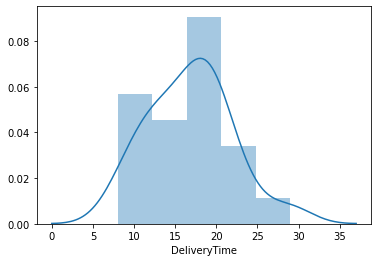

In [7]:
import seaborn as sns
sns.distplot(data['DeliveryTime'])

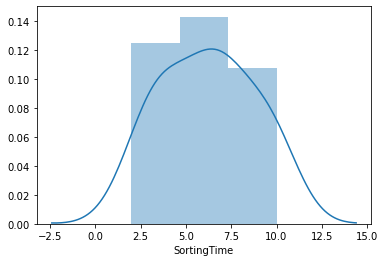

In [8]:
sns.distplot(data['SortingTime'])

In [9]:
import statsmodels.formula.api as smf
model = smf.ols("DeliveryTime~SortingTime",data = data).fit()

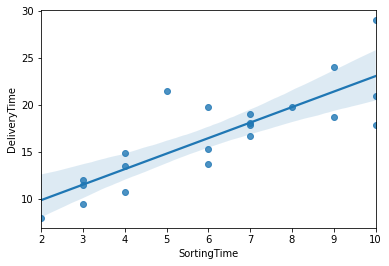

In [10]:
sns.regplot(x="SortingTime", y="DeliveryTime", data=data);

In [11]:
model.params

Intercept      6.582734
SortingTime    1.649020
dtype: float64

In [12]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues) 

Intercept      3.823349
SortingTime    6.387447
dtype: float64 
 Intercept      0.001147
SortingTime    0.000004
dtype: float64


In [13]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

Prediction for new Values

In [14]:
DeliveryTime= 6.582734+(1.649020*5)
DeliveryTime

14.827834

In [15]:
newdata=pd.Series([24,12,1])

In [16]:
data_for_pred=pd.DataFrame(newdata,columns=['SortingTime'])

In [18]:
data_for_pred

,SortingTime
0,24
1,12
2,1


In [19]:
#Prediction from model
model.predict(data_for_pred)

0    46.159211
1    26.370973
2     8.231754
dtype: float64